In [35]:
import pandas as pd
import numpy as np
pd.set_option("display.precision", 2)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

#### Lets import the dataset we have created first

In [23]:
df = pd.read_csv("./Data/data.csv",sep=",")
df.drop(['Unnamed: 0'], axis=1, inplace=True) # There were some formatting issues while
                                              # writing the csv

# BASIC EDA

In [24]:
df.head()

,DISTRICT,UPAZILA,STATION_ID,STATION_NAME,DATE,RAIN_FALL(mm),LATITUDE,LONGITUDE,WATER_LEVEL(m)
0,Bandarban,Lama,CL317,Lama,01-jan-2017,0.0,21.81,92.19,6.22
1,Bandarban,Lama,CL317,Lama,02-jan-2017,0.0,21.81,92.19,6.22
2,Bandarban,Lama,CL317,Lama,03-jan-2017,0.0,21.81,92.19,6.22
3,Bandarban,Lama,CL317,Lama,04-jan-2017,0.0,21.81,92.19,6.21
4,Bandarban,Lama,CL317,Lama,05-jan-2017,0.0,21.81,92.19,6.21


The shape of our dataset:
- we have 1826 samples containing 9 features(includes target)

In [25]:
df.shape

(1826, 9)

The columns are:

In [26]:
df.columns

Index(['DISTRICT', 'UPAZILA', 'STATION_ID', 'STATION_NAME', 'DATE',
       'RAIN_FALL(mm)', 'LATITUDE', 'LONGITUDE', 'WATER_LEVEL(m)'],
      dtype='object')

Lets look at the data types:

In [27]:
df.dtypes

DISTRICT           object
UPAZILA            object
STATION_ID         object
STATION_NAME       object
DATE               object
RAIN_FALL(mm)     float64
LATITUDE          float64
LONGITUDE         float64
WATER_LEVEL(m)    float64
dtype: object

- **DATE** is rendered as object! Need to convert it to datatime feature! 

In [30]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [31]:
df.dtypes

DISTRICT                  object
UPAZILA                   object
STATION_ID                object
STATION_NAME              object
DATE              datetime64[ns]
RAIN_FALL(mm)            float64
LATITUDE                 float64
LONGITUDE                float64
WATER_LEVEL(m)           float64
dtype: object

Lets check for general infos!

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DISTRICT        1826 non-null   object        
 1   UPAZILA         1826 non-null   object        
 2   STATION_ID      1826 non-null   object        
 3   STATION_NAME    1826 non-null   object        
 4   DATE            1826 non-null   datetime64[ns]
 5   RAIN_FALL(mm)   1826 non-null   float64       
 6   LATITUDE        1826 non-null   float64       
 7   LONGITUDE       1826 non-null   float64       
 8   WATER_LEVEL(m)  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 128.5+ KB


Things to notics:
- Theres no missing values in our dataset!

Lets check statistical properties of the numerical values:

In [ ]:
df.describe()

,RAIN_FALL(mm),LATITUDE,LONGITUDE,WATER_LEVEL(m)
count,1826.00,1.83e+03,1.83e+03,1826.00
mean,10.00,2.18e+01,9.22e+01,6.81
std,26.09,6.04e-14,1.76e-12,0.97
min,0.00,2.18e+01,9.22e+01,5.86
25%,0.00,2.18e+01,9.22e+01,6.19
50%,0.00,2.18e+01,9.22e+01,6.50
75%,6.28,2.18e+01,9.22e+01,7.15
max,273.00,2.18e+01,9.22e+01,13.54


and for non numerical features:

In [34]:
df.describe(include=["object"])

,DISTRICT,UPAZILA,STATION_ID,STATION_NAME
count,1826,1826,1826,1826
unique,1,1,1,1
top,Bandarban,Lama,CL317,Lama
freq,1826,1826,1826,1826


Note:
- as these categorical features only has one values, they wont contribute anything to the model!

# Visual Analysis

#### Histogram and Density plots

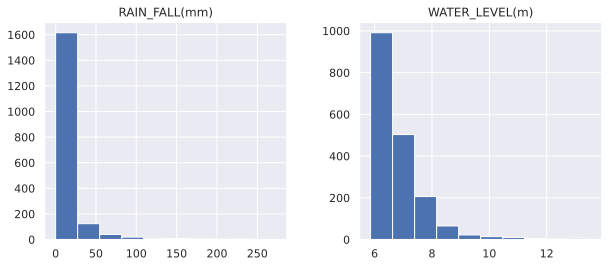

In [40]:
features = ['RAIN_FALL(mm)','WATER_LEVEL(m)']
df[features].hist(figsize=(10,4))
plt.show()

Note:
- Not normally distributed! Need to change standarize the dataset later

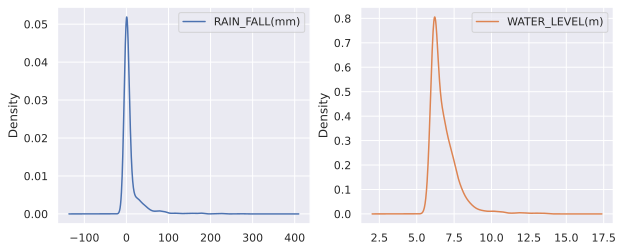

In [42]:
df[features].plot(
    kind="density",subplots=True,layout=(1,2),sharex=False,figsize=(10,4)
)
plt.show()

#### Box Plot

Let’s see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th and 75th percentiles. The vertical line inside the box marks the median (50%) of the distribution.

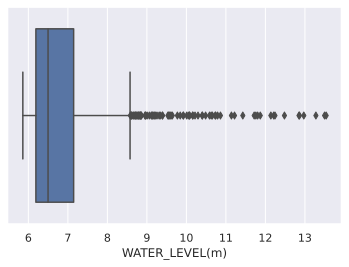

In [44]:
sns.boxplot(x="WATER_LEVEL(m)",data=df)
plt.show()

Note:
- Theres so many outliers!

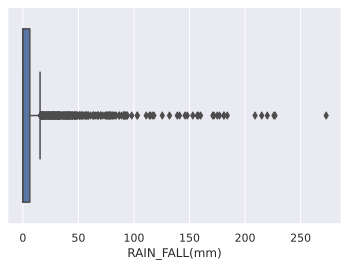

In [45]:
sns.boxplot(x="RAIN_FALL(mm)",data=df)
plt.show()

Note: 
- Again so many outliers

My general assumption is as this is indeed a time series data, its intrinsic to have these outliers due to trend, seasonality and other factors regarding the weather. But as I'm not going to treat as time series data, I have to decide whether I want these outliers to be removed or not!

### Correlation Matrix

<AxesSubplot:>

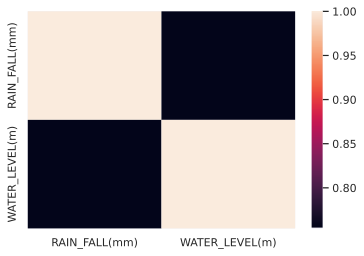

In [46]:
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix)

Note:
- From the visual it seems like they are around .80 correlation between rain_fall and water_level! (GOOD SIGN!) 

#### Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space.

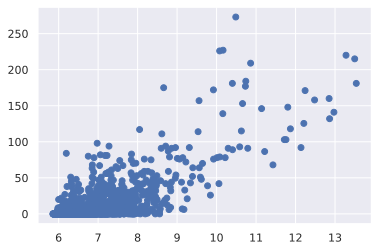

In [47]:
plt.scatter(df['WATER_LEVEL(m)'],df['RAIN_FALL(mm)'])
plt.show()

Note:
- Not so linear due to outliers!
- But it obvious there exists positive relationship between these two features!